In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
clusters=[]
with open('../input/graphcc2.txt') as f:
    for line in f:
        clusters.append(  line.split(","))
    

In [3]:
len(clusters)

8827

In [4]:
clusters_size=[len(u) for u in clusters]

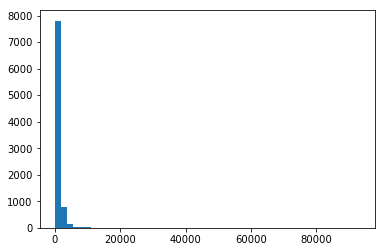

In [5]:
plt.hist(sorted(clusters_size),bins=50);

In [6]:
np.where(np.array(clusters_size)>10000)

(array([ 166,  252,  285,  299,  304,  415,  442,  445,  484,  511,  545,
         631,  655,  771,  876,  931,  990, 1039, 1184, 1250, 1757, 1875,
        2143, 2194, 2242, 2486, 2506, 2520, 2611, 2653, 3509, 5235, 5382,
        6363, 6607, 7050, 7150, 7374, 8229, 8710]),)

In [7]:
import networkx as nx

In [8]:
def find_simple_paths(g):
    #a=nx.simple_cycles(g)
    #assert(len(list(a))==0)
    degrees=g.degree()
    a=pd.Series(list(degrees.values())).value_counts()
    assert((a.index<=2).all())
    one_degree_nodes= [k for k,v in degrees.items() if v==1]
    paths=[]
    for u in one_degree_nodes:
        for v in one_degree_nodes:
            if u!=v:
                path=list(nx.all_simple_paths(g,u,v))
                if path:
                    paths.append(path)
    #print len(paths)
    return paths    

In [9]:
def analyze(cluster):
    nodes=[u.split(" ") for u in cluster]
    print "#nodes", len(nodes)
    commons=(set([" ".join(u[:-1]) for u in nodes] + [" ".join(u[1:]) for u in nodes]))  
    print "#commons", len(commons)
    
    srcnodes=pd.DataFrame([[" ".join(u[:-1])," ".join(u)] for u in nodes],columns=['core','dest'])
    destnodes=pd.DataFrame([[" ".join(u[1:])," ".join(u)] for u in nodes],columns=['core','src'])
    edges=pd.merge(srcnodes,destnodes, on='core',how='inner')
    edges=edges[['core','src','dest']]
    print srcnodes.shape,destnodes.shape,edges.shape
    
    node_degrees= pd.concat([edges.src,edges.dest]).value_counts()
    print "node degree", node_degrees.value_counts().to_dict()
    
    filterred_nodes= set(node_degrees[node_degrees<=2].index)
    print "#filterred_nodes", len(filterred_nodes)
    
    single_edges=edges[(edges.src.isin(filterred_nodes)) & (edges.dest.isin(filterred_nodes))]
    G=nx.DiGraph()
    for _,s,d in single_edges.values:
        G.add_edge(s,d)
        
    degrees=G.degree()   
    print pd.Series(list(degrees.values())).value_counts()
    
    #one_degree_nodes= [k for k,v in degrees.items() if v==1]
    paths=[]
    for cc in nx.weakly_connected_component_subgraphs(G):
        paths+=find_simple_paths(cc)
        
    pages=[]
    for p in paths:
        a=" ".join([u[0] for u in [v.split(" ") for v in p[0][:-1]]])
        pages.append(a+" " + p[0][-1])
    return pages

In [ ]:
pages=[]
for i,cluster in enumerate(clusters):
    print "Starts", i
    a=analyze(cluster)
    print i,len(a)
    print "End\n"
    pages+=a

In [12]:
len(pages)

24034

In [17]:
a=np.array([len(u.split(" ")) for u in pages])

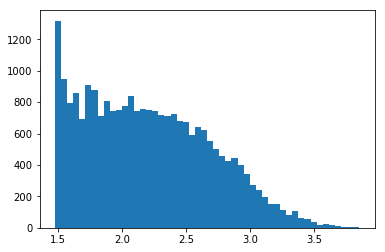

In [19]:
plt.hist(np.log10(a),bins=50);

In [24]:
with open("../input/pages.txt", 'w') as f:
    for p in pages:
        f.write(p.strip())
        f.write("\n")

In [25]:
len(pages)

24034